In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [2]:
A = np.zeros((6, 3), int)
A[0::2, 0::2] = 1
A[1::2, 1::2] = 1
B = np.arange(1, 25).reshape(6, 4)
B[1::2, :] = B[1::2, ::-1]
C = np.random.randint(2, 11, (4, 3))
D = np.eye(4, dtype = int)

S = np.vstack((np.hstack((A, B)), np.hstack((C, D))))

F = np.zeros((10, 2), int)

G = np.hstack((S, F))

# YOUR CODE HERE
print(G)

[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 6  2  5  1  0  0  0  0  0]
 [ 4  4  5  0  1  0  0  0  0]
 [ 6  3  8  0  0  1  0  0  0]
 [ 3 10  6  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [3]:
def find_nearest_neighbour(X, a):
    differences = np.abs(X - a)
    index = np.argmin(differences)
    return X.ravel()[index]

X = np.arange(0, 10).reshape((2, 5))
a = 3.6
print(find_nearest_neighbour(X, a))

4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [4]:
# Придумайте свои данные для примера, N >= 4
N = 5
A = np.random.rand(N, N)
b = np.random.rand(N)
X = np.random.rand(N)

def very_strange_neural_network(A, b, X):
    return (X @ (A @ A)) @ b


print(very_strange_neural_network(A, b, X))

3.3034085657973704


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [5]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return -1 * np.sum(M[M < 0])

def find_max_height(M):
    return np.max(M[M > 0])

In [6]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [7]:
def count_all_islands(a):
    return np.sum(np.diff(a) == 1)

In [8]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [9]:
def swap_mask_for_average(X, a):
    X[X > a] = np.mean(X)
    return X

In [10]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [11]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))

In [12]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [13]:
def create_mountain(a):
    N = len(a)
    up_left_quarter = (np.arange(N).reshape(N, 1) + a.reshape(1, N))
    up_half = np.hstack((up_left_quarter, up_left_quarter[:, ::-1]))
    return np.vstack((up_half, up_half[::-1]))

In [14]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [15]:
def custom_blur(P, C):
    N, M = P.shape
    new_N = N - C + 1
    new_M = M - C + 1
    new_matrix = np.zeros((new_N, new_M))

    for i in range(new_N):
        for j in range(new_M):
            sub_matrix = P[i:i+C, j:j+C]
            new_matrix[i, j] = np.mean(sub_matrix)

    return new_matrix

In [16]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [17]:
def check_successful_broadcast(*matrices):
    shapes = [matrix for matrix in matrices]
    max_shape = [] # развернутый размер итоговой матрицы после каждого шага

    for shape in shapes:
        shape = list(reversed(shape))
        while len(max_shape) < len(shape):
            max_shape.append(1)

        for i in range(len(shape)):
            if shape[i] != max_shape[i] and max_shape[i] != 1 and shape[i] != 1:
                return False
            max_shape[i] = max(max_shape[i], shape[i])

    return True

In [18]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах
assert not check_successful_broadcast((5, 1, 7), (6, 7), (5, 1))
assert check_successful_broadcast((5, 6, 7), (1, 1), (7, 1, 1, 1))
assert check_successful_broadcast((1, 6, 7), (5, 1, 7), (1, 62, 5, 6, 7))

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [19]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, np.newaxis] - B[np.newaxis, :]) ** 2).sum(axis = 2))

In [20]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])

pairwise_distances(A, B)

array([[ 5.65685425,  8.48528137, 11.3137085 ],
       [ 2.82842712,  5.65685425,  8.48528137]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Мы делаем тензор A размера m x 1 x k и тензор B размера 1 x n x k. Таким образом, при вычитании происходит бродкаст в тензор m x n x k такой, что в "ячейке" (i, j) лежит вектор разности i-й строки матрицы A и j-й строки матрицы B, или, другими словами, разность координат этих векторов. Затем мы возводим все элементы тензора в квадрат и суммируем по второй оси (размера k), получая сумму квадратов разности координат векторов, взяв корень из которых, получаем матрицу размера m x n, элемент (i, j) которой равен евклидовому расстоянию между векторами из i-й строки матрицы A и j-й строки матрицы B.

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [22]:
import contextlib
import os

import warnings
warnings.filterwarnings("ignore")

with open(os.devnull, 'w') as fnull:
    with contextlib.redirect_stdout(fnull), contextlib.redirect_stderr(fnull):
        !pip install gdown

import gdown

In [23]:
# YOUR CODE HERE
url = 'https://drive.google.com/uc?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq'
gdown.download(url, 'data_numpy_lab.csv', quiet = True)

'data_numpy_lab.csv'

In [24]:
# вынес в отдельную ячейку, ибо в процессе работы время от времени
# приходилось обновлять датафрейм
data = pd.read_csv('data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [25]:
# YOUR CODE HERE
data = data.drop(data.columns[0], axis = 1)
# содержит лишний столбец нумерации данных

data.rename(columns = {
    'N': 'N',
    't, sec': 't',
    'sigma_t, sec': 'sigma_t',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'phi'
}, inplace = True)

data['mass'] /= 1000
data['length'] /= 100

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,N,t,sigma_t,mass,length,phi
0,4,268,1,0.18,1.21,0.16
1,4,264,1,0.18,1.21,0.18
2,4,275,1,0.18,1.21,0.16
3,4,263,1,0.18,1.21,0.17
4,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [26]:
# YOUR CODE HERE
data['omega'] = 2 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] / data['t'] * data['sigma_t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * 9.8 * data['length']
data['momentum_down'] = data['mass'] * data['phi'] / (data['t'] ** 2)
data['momentum_down'] *= (data['length'] ** 2) # не влезло в строчку
data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()

,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [27]:
# YOUR CODE HERE
grouped_data = data.groupby('mass').mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,N,t,sigma_t,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,
0.142,3.0,282.8,1.0,1.21,0.158,0.066661,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,4.0,267.4,1.0,1.21,0.168,0.094012,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,3.0,230.8,1.0,1.08,0.164,0.081687,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,4.0,175.4,1.0,1.22,0.164,0.143300,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,5.0,208.4,1.0,1.10,0.166,0.150752,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,6.0,203.6,1.0,1.11,0.166,0.185194,0.000910,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

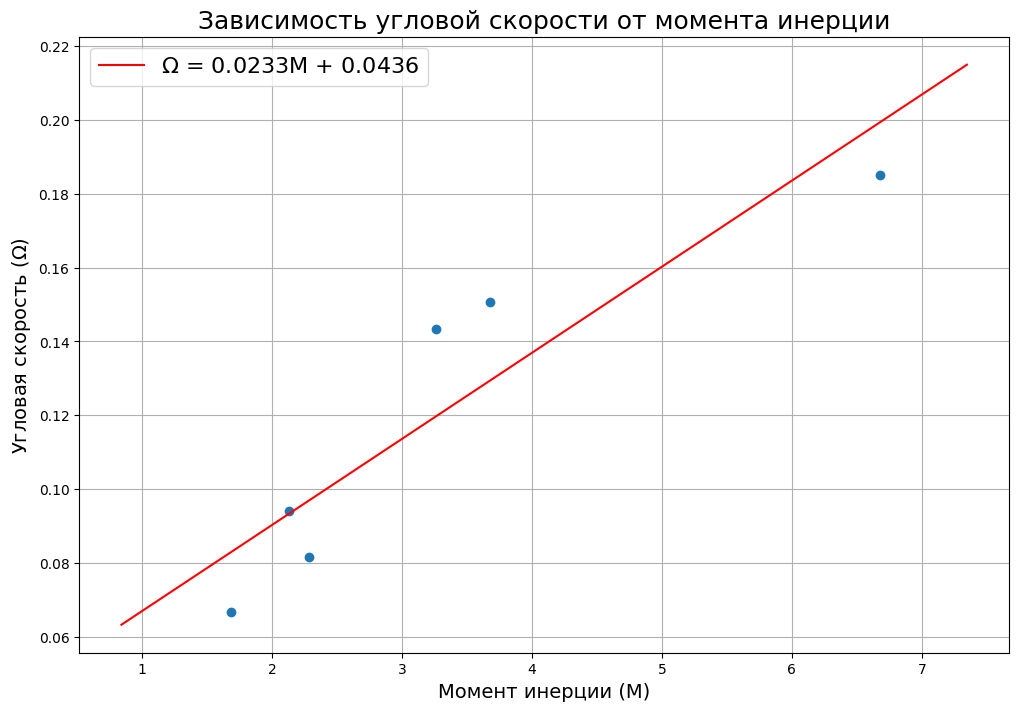

In [28]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Воспользуйтесь np.polyfit
coefs = np.polyfit(momentum_np, omega_np, 1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

# YOUR CODE HERE
plt.scatter(momentum_np, omega_np)
plt.plot(x_lsq, y_lsq, color = 'red',
         label = f'$\Omega$ = {coefs[0]:.4f}M + {coefs[1]:.4f}')
plt.xlabel('Момент инерции (M)', fontsize = 14)
plt.ylabel('Угловая скорость ($\Omega$)', fontsize = 14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize = 18)
plt.grid(True)
plt.legend(fontsize = 16)
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [29]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

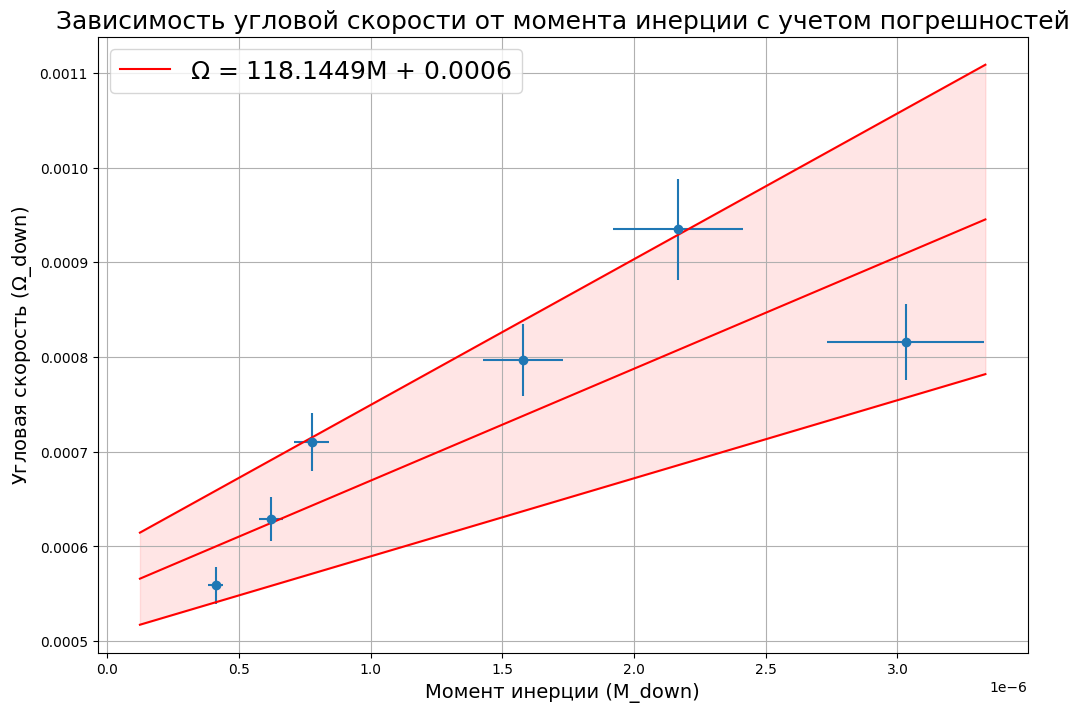

In [30]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

# Снова polyfit, но с дополнительным параметром и возвращающий ковариацию!
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1,
                        w = 1/grouped_data['sigma_down'], cov = True)

# Чтобы прямая построилась снова красиво
x_lsq = np.linspace(momentum_down_np.min() * 0.3,
                    momentum_down_np.max() * 1.1, 100)

# Посчитайте корень диагональных элементов, должен получиться массив размером (2,)
lsq_stds = np.sqrt(np.diag(cov))

# Знакомый polyfit, но три раза
y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval([coefs[0] - lsq_stds[0],
                          coefs[1] - lsq_stds[1]], x_lsq)
y_lsq_upper = np.polyval([coefs[0] + lsq_stds[0],
                          coefs[1] + lsq_stds[1]], x_lsq)

fig = plt.figure(figsize=(12, 8))

# YOUR CODE HERE
plt.errorbar(momentum_down_np, omega_down_np, fmt = 'o',
             xerr = grouped_data['sigma_momentum'],
             yerr = grouped_data['sigma_down'])
plt.plot(x_lsq, y_lsq, color = 'red',
         label = f'$\Omega$ = {coefs[0]:.4f}M + {coefs[1]:.4f}')
plt.plot(x_lsq, y_lsq_lower, color = 'red')
plt.plot(x_lsq, y_lsq_upper, color = 'red')
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color = 'red', alpha = 0.1)

plt.xlabel('Момент инерции (M_down)', fontsize = 14)
plt.ylabel('Угловая скорость ($\Omega$_down)', fontsize = 14)
plt.title('Зависимость угловой скорости от момента инерции с учетом погрешностей',
          fontsize = 18)
plt.grid(True)
plt.legend(fontsize = 18)
plt.show()

P.S. Графики не совпадают, скорее всего, из-за путаницы с формулой `sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2(?) \cdot \frac{\sigma_t}{t}$, но так как в чате сказали оставить формулу с двойкой (плюс она проходит assert в своей ячейке), считаю сей график верным.

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [31]:
sns.set_style("darkgrid")

In [32]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv

iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

# TODO
iris = iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [34]:
# На будущее, чтобы надписи на графиках были на русском:
iris.columns = ['Длина чашелистика, см', 'Ширина чашелистика, см',
                'Длина лепестка, см', 'Ширина лепестка, см', 'Вид']
iris.head()

,"Длина чашелистика, см","Ширина чашелистика, см","Длина лепестка, см","Ширина лепестка, см",Вид
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# TODO
species_counts = iris['Вид'].value_counts()
print(species_counts)

Вид
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

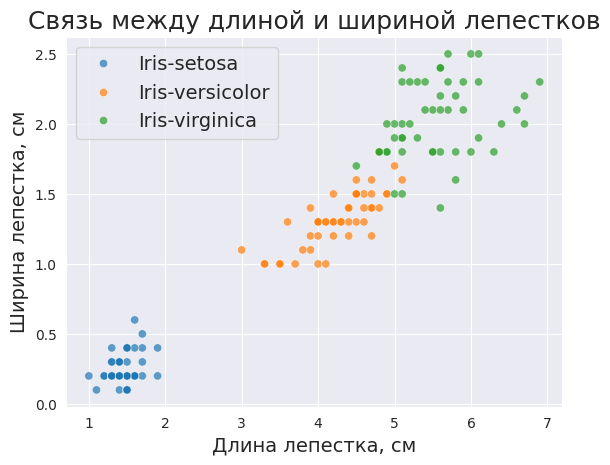

In [36]:
# TODO
sns.scatterplot(data = iris, x = 'Длина лепестка, см',
                y = 'Ширина лепестка, см', hue = 'Вид', alpha = 0.7)
plt.title('Связь между длиной и шириной лепестков', fontsize = 18)
plt.xlabel('Длина лепестка, см', fontsize = 14)
plt.ylabel('Ширина лепестка, см', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid(True)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

Во-первых, видна положительная корреляция между шириной и длиной лепестка (максимальная корреляция у versicolor, минимальная, я бы сказал, у setosa (p.s. флешбеки по поводу парадокса Симпсона, но тут при объединении видов все равно видна положительная корреляция)). Во-вторых, явно видна разница между видами: самые маленькие лепестки у setosa, самые большие у virginica, хотя virginica и versicolor можно спутать между собой, так как у них могут быть одни значения величины лепестка, в то время как setosa с ними не спутаешь. Графику для пущей информативности, на мой взгляд, не хватает линий регрессии для отображения зависимости (причем и общей для всех ирисов, и частной для каждого вида), а также примерных границ областей распределения видов с разграничением плотности (то есть отобразив плотность вектора в "каждой" точке) в каждой отдельной области (так как видно, что существуют повторы в виде нескольких разных ирисов с одинаковыми длиной и шириной лепестка).

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

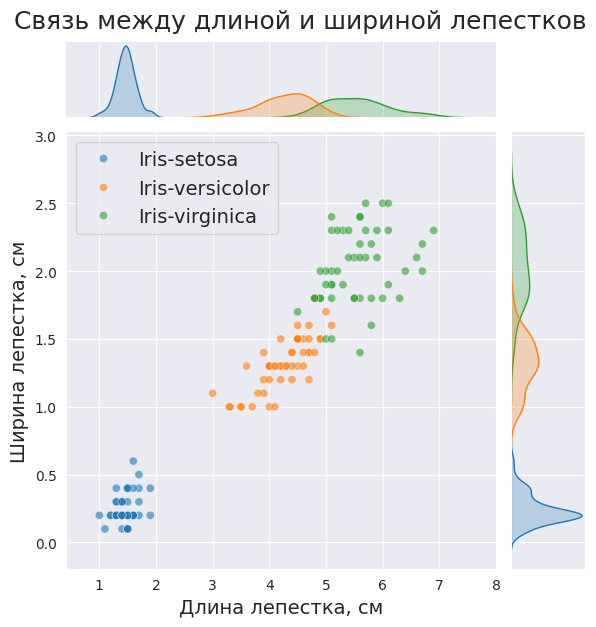

In [37]:
#TODO
j_plot = sns.jointplot(data = iris, x = 'Длина лепестка, см',
                       y = 'Ширина лепестка, см', hue = 'Вид', alpha = 0.6)
j_plot.fig.suptitle('Связь между длиной и шириной лепестков',
                    y = 1.03, fontsize = 18)
j_plot.ax_joint.set_xlabel('Длина лепестка, см', fontsize = 14)
j_plot.ax_joint.set_ylabel('Ширина лепестка, см', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

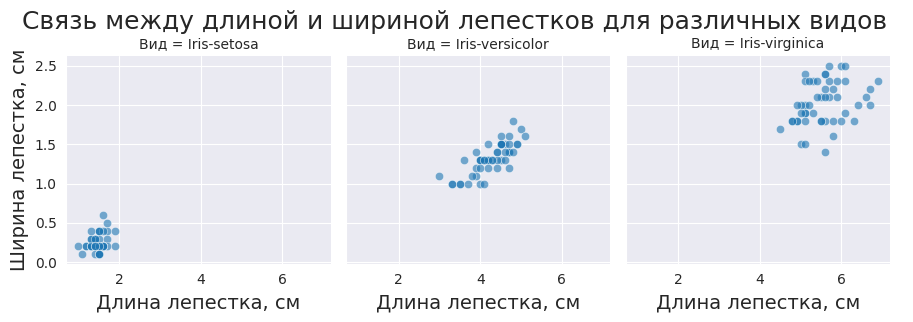

In [38]:
f_grid = sns.FacetGrid(iris, col = 'Вид', height = 3, aspect = 1)
f_grid.map(sns.scatterplot, 'Длина лепестка, см', 'Ширина лепестка, см',
           alpha = 0.6)
f_grid.add_legend()
f_grid.set_axis_labels('Длина лепестка, см', 'Ширина лепестка, см',
                       fontsize = 14)
f_grid.fig.suptitle('Связь между длиной и шириной лепестков для различных видов',
                    y = 1.04, fontsize = 18)
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Jointplot показал плотность распределения значений длины и ширины, это полезная информация. Facetgrid, в свою очередь, ничего нового не показал. В данном конкретном случае, по моему мнению, jointplot неплох, но содержит информацию, тяжело воспринимаю визуально (плотность, которая еще и нарисована сбоку), поэтому scatterplot, по моему мнению,лучше в данном случае, тем более что возможно есть способ отобразить плотность лучше с визуальной стороны (как я писал перед этими двумя графиками). В jointplot, конечно, параметр kind можно было передать как "kde", но тогда получается тяжело воспринимаемая вещь. Facetgrid же по сути здесь вообще неактуален, так как имеется почти явное разграничение по видам и ввиду малого количества данных его легко наблюдать на одном графике, и для этого не нужно несколько разных.

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

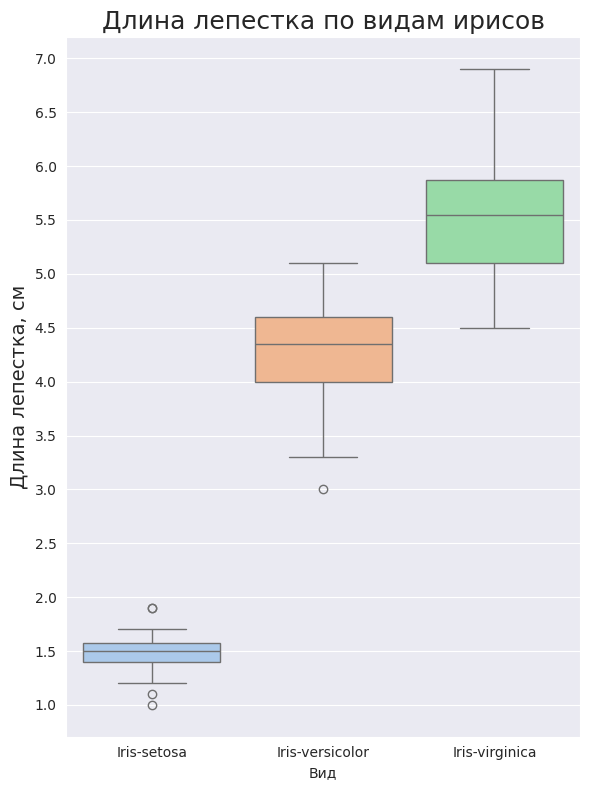

In [39]:
# TODO
fig = plt.figure(figsize = (6, 8))

sns.boxplot(data = iris, x = 'Вид', y = 'Длина лепестка, см',
            palette = 'pastel')
plt.title('Длина лепестка по видам ирисов', fontsize = 18)
plt.ylabel('Длина лепестка, см', fontsize = 14)
plt.yticks(np.arange(1, 7.5, 0.5))
plt.tight_layout()
plt.show()

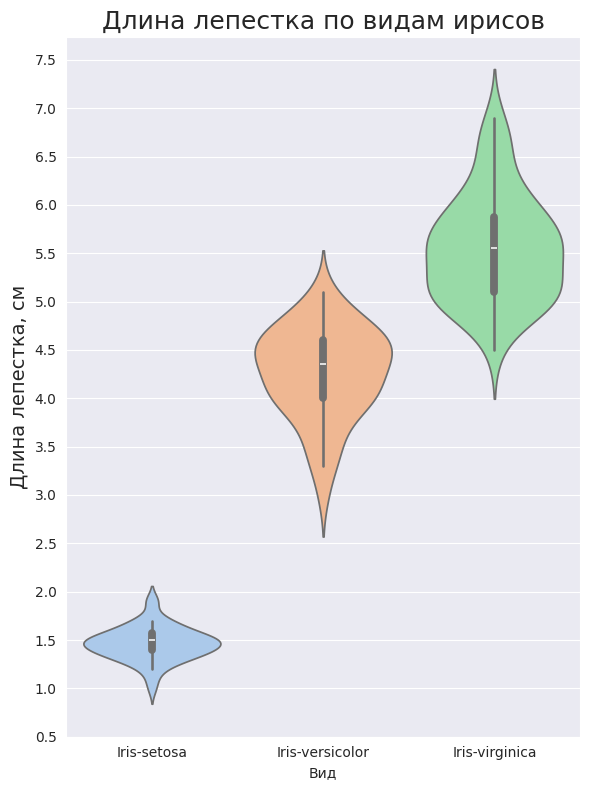

In [40]:
fig = plt.figure(figsize = (6, 8))

sns.violinplot(data = iris, x = 'Вид', y = 'Длина лепестка, см',
               palette = 'pastel')
plt.title('Длина лепестка по видам ирисов', fontsize = 18)
plt.ylabel('Длина лепестка, см', fontsize = 14)
plt.yticks(np.arange(0.5, 8, 0.5))
plt.tight_layout()
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Более информативным является boxplot, так как там можно найти много важной статистической информации: межквартильный размах (ящик), медиана (полоса разделения), первый и третий квартили (нижний и верхний ус соответственно) и выбросы (не попавшие на усы точки). Более же красивым визуально является violinplot, на нем мы видим медиану и плотность распределения (которая в других случаях может быть более информативной, чем статистические "точки" прошлого графика, если нам важнее знать где сосредоточены данные).

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

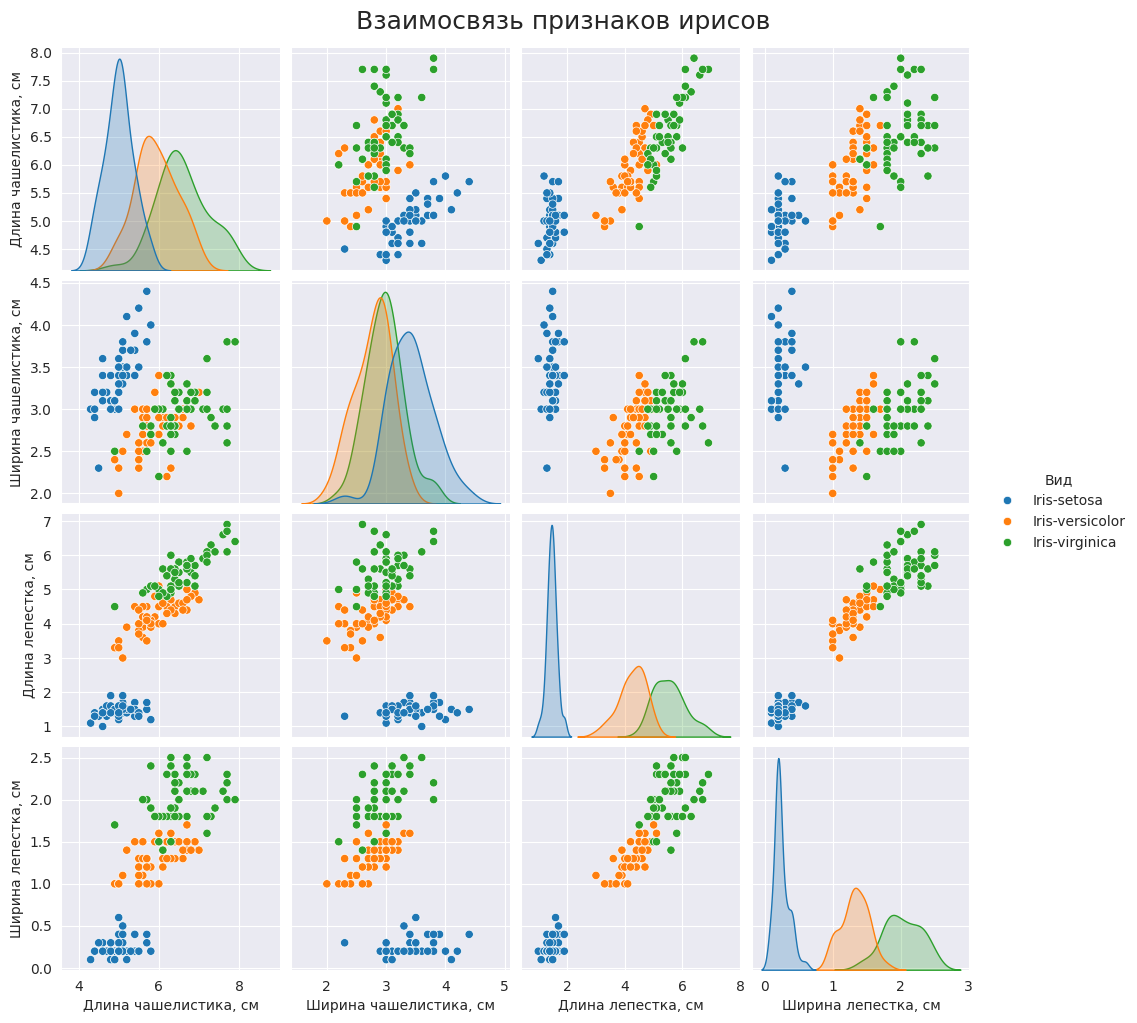

In [41]:
# TODO
sns.pairplot(iris, hue = 'Вид')
plt.suptitle('Взаимосвязь признаков ирисов', y = 1.02, fontsize = 18)
plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Из нижней правой четверти ничего нового (это уже было исследовано раньше). Из правой верхней мы можем узнать, что setosa вновь отличается от двух других типов по размеру чашелистика: (длина меньше, ширина больше, но в этот раз есть пересечение с размерами других видов), а для vriginica характерны более длинные чашелистики. Также можно заметить, что для каждого вида по отдельности чем шире чашелистик, тем он и длиннее, и наоборот, но вот для всех видов разом про подобную корреляцию сказать сложно (p.s. парадокс Симпсона ура). Из левой нижней четверти (которая является перевернутой правой верхней) мы можем узнать, что для setosa размеры чашелистика совсем или почти не зависят от размеров лепестка (по данным точкам явно хочется нарисовать линию регрессии как y = const, где y - размер лепестка), для других же двух видов можно заметить, что размеры лепестка и чашелистика имеют положительную корреляцию, которая особенно заметна при сравнении длины оных и менее заметна при учете ширины.

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Графики плотности для каждого признака по отдельности для всех видов.

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

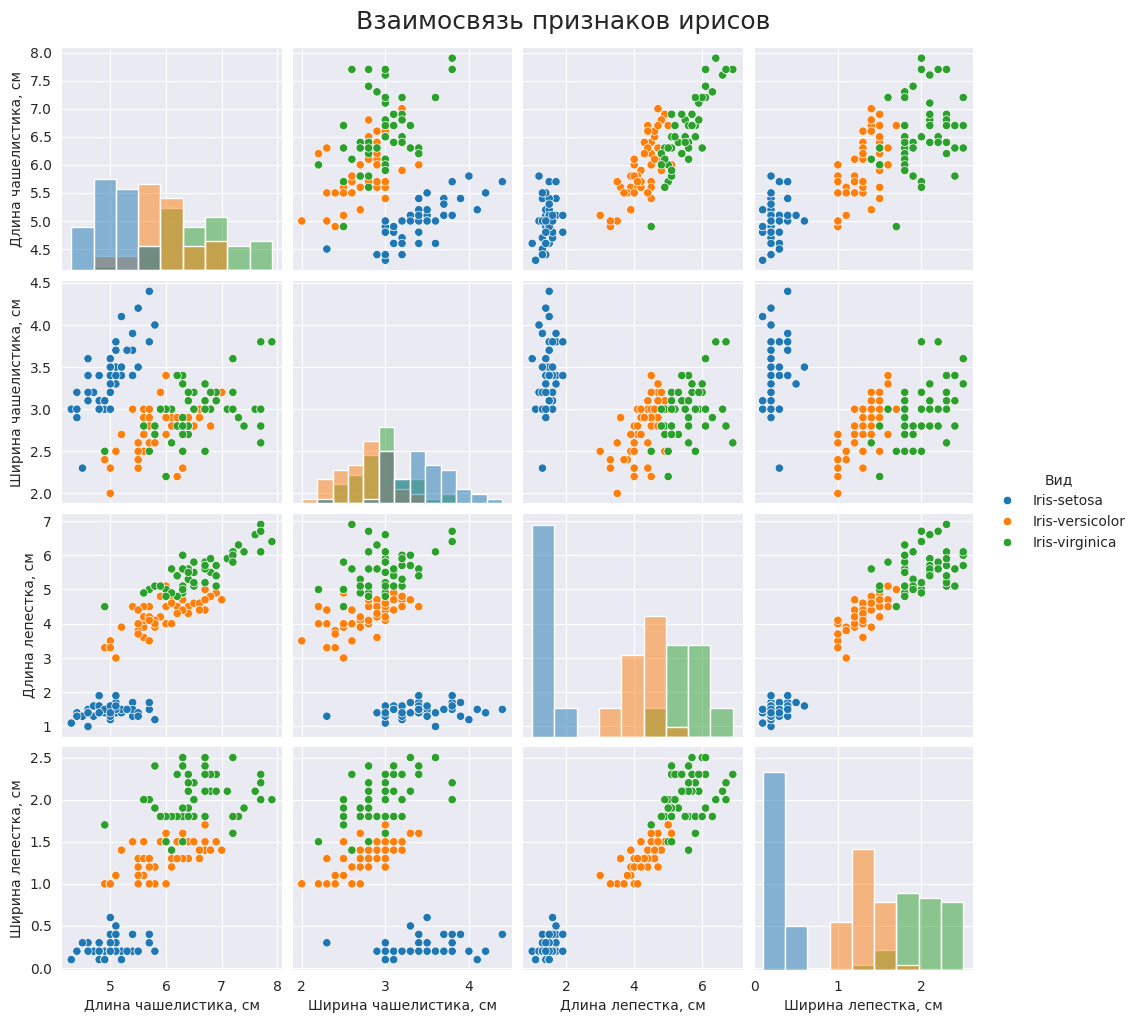

In [42]:
# TODO
sns.pairplot(iris, hue = 'Вид', diag_kind = 'hist')
plt.suptitle('Взаимосвязь признаков ирисов', y = 1.02, fontsize = 18)
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Теперь на диагоналях показаны гистограммы для каждого признака, что тоже показывает, как распределены данные, но, по моему мнению, менее информативным и менее визуально привлекательным образом.